In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv


In [26]:
data = pd.read_csv("/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv")
df = pd.DataFrame(data)
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [27]:
data = pd.read_csv("/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv")
df = pd.DataFrame(data)
df = df.drop(["condition","vin","Unnamed: 0","lot","country","title_status","color"], axis = 1)
df

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida
...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,23609.0,california
2495,9200,nissan,versa,2018,34553.0,florida
2496,9200,nissan,versa,2018,31594.0,florida
2497,9200,nissan,versa,2018,32557.0,florida


In [28]:
import matplotlib.pyplot as plt
from sklearn import linear_model

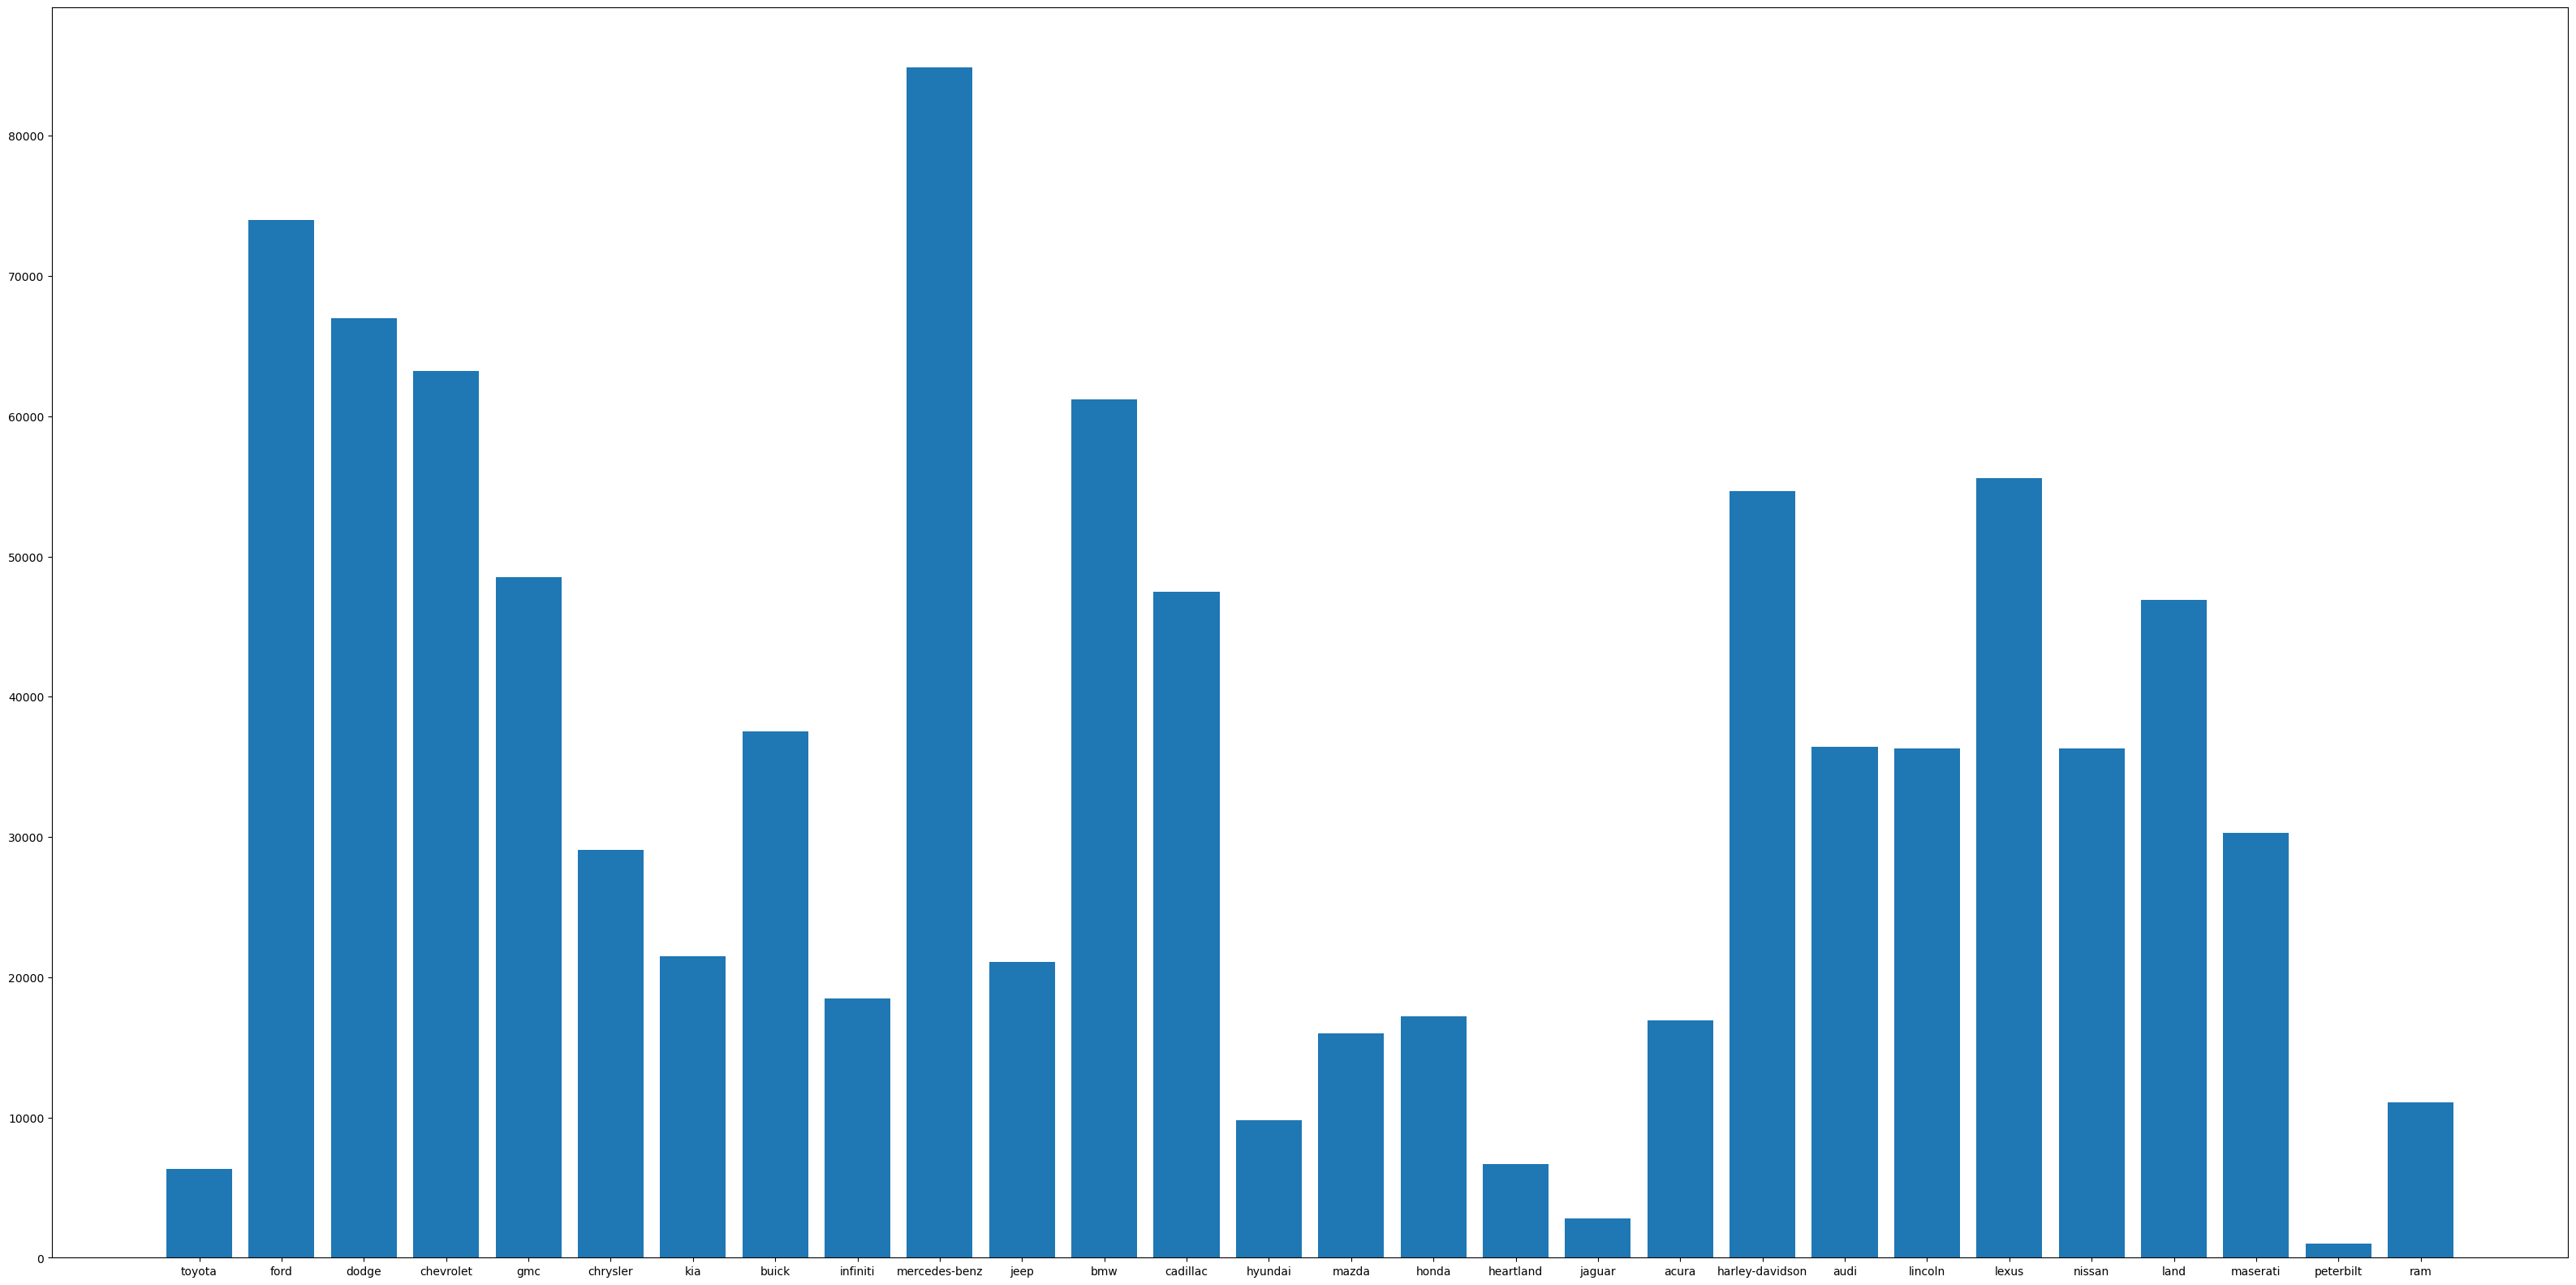

In [29]:
plt.figure(figsize = (40,20))
plt.bar(data["brand"],data["price"])
plt.show()

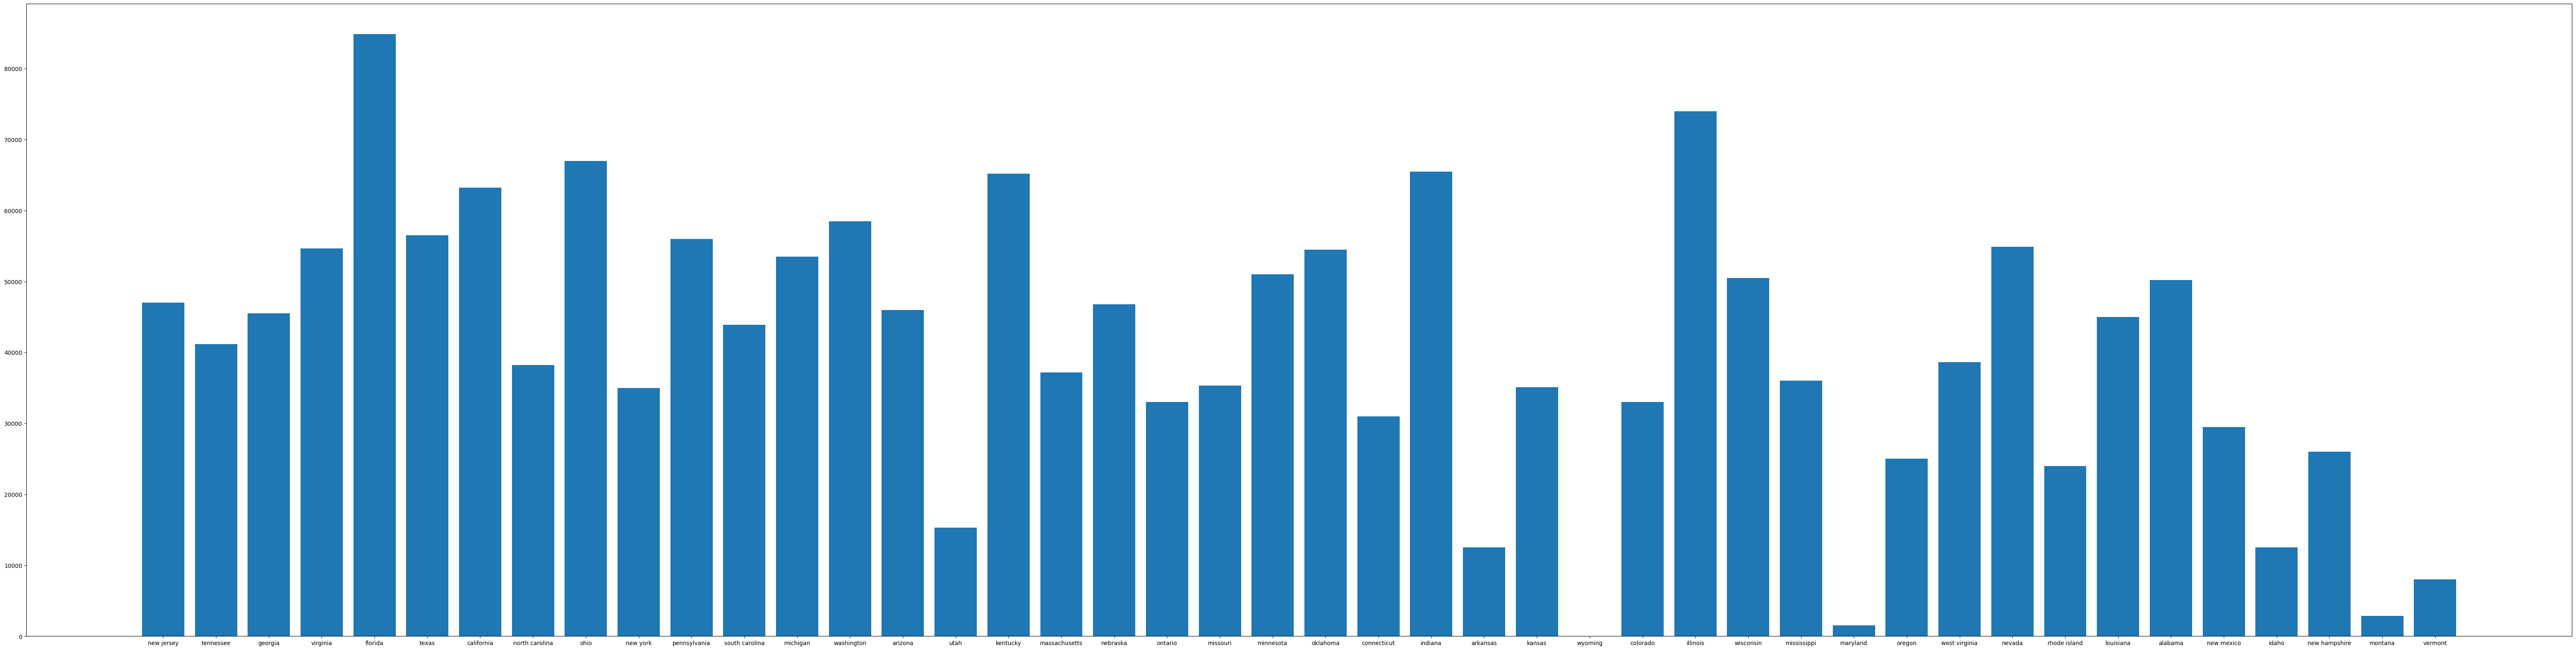

In [30]:
plt.figure(figsize = (80,20))
plt.bar(data["state"],data["price"])
plt.show()

In [31]:
brand = []
state = []
brand = df["brand"].value_counts()
state = df["state"].value_counts()
print(brand)
print()
print(state)

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: brand, dtype: int64

pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
south carolina 

In [32]:
df

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida
...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,23609.0,california
2495,9200,nissan,versa,2018,34553.0,florida
2496,9200,nissan,versa,2018,31594.0,florida
2497,9200,nissan,versa,2018,32557.0,florida


In [33]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns = ["brand","state","model"])
df.head()


,price,year,mileage,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra
0,6300,2008,274117.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5350,2018,39590.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X = df.drop(["price"], axis=1)
y = df["price"]
df


,price,year,mileage,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra
0,6300,2008,274117.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5350,2018,39590.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2495,9200,2018,34553.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2496,9200,2018,31594.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2497,9200,2018,32557.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)


> **Linear Regression**

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [37]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_true=y_test, y_pred=y_pred))

from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.6303002228028268
Mean Squared Error: 51703020.998992845
RMSE: 7190.4812772854675


> **Random Forest Regressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_true=y_test, y_pred=y_pred))

from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.6769503765973011
Mean Squared Error: 45178932.9956734
RMSE: 6721.527579030931
